# Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Install libraries

# Import Libraries

In [2]:
#Load the required libraries

import pandas as pd
import numpy as np
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
# import plotly.express as px
# import plotly.graph_objects as go
plt.style.use('seaborn-v0_8-darkgrid')


from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

import joblib

from statsmodels.tsa.arima.model import ARIMA


# import prophet
# from prophet import Prophet
# from prophet.plot import plot_plotly, plot_components_plotly
# from prophet.plot import add_changepoints_to_plot

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# import xgboost as xgb
# from xgboost import plot_importance, plot_tree

# import tensorflow as tf
# from keras.models import Sequential,load_model
# from keras.layers import Dropout, Dense, LSTM, GRU
# from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler


from pylab import rcParams
rcParams['figure.figsize'] = 14, 8


# from matplotlib import rc

# sns.set(style='whitegrid', palette='muted', font_scale=1.5)

# RANDOM_SEED = 42

# np.random.seed(RANDOM_SEED)

import warnings
warnings.filterwarnings("ignore")


# Import Data

In [3]:
data_ETH = pd.read_csv("/content/drive/MyDrive/ETHUSDT_merged.csv")

In [4]:
data_ETH.head()

,open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume
0,2019-09-01 00:00:00,171.52,172.89,171.36,172.45,5981.16399,2019-09-01 00:59:59.999,1.030126e+06,3753,3576.32332,615886.585686
1,2019-09-01 01:00:00,172.47,173.42,172.41,172.71,7929.54701,2019-09-01 01:59:59.999,1.372183e+06,3310,5532.93656,957301.238661
2,2019-09-01 02:00:00,172.67,172.97,172.02,172.43,2650.04457,2019-09-01 02:59:59.999,4.568114e+05,2666,1333.25886,229852.921103
3,2019-09-01 03:00:00,172.41,172.83,172.32,172.57,2676.49085,2019-09-01 03:59:59.999,4.618308e+05,2612,1445.60395,249450.124375
4,2019-09-01 04:00:00,172.50,172.74,172.11,172.46,2596.85893,2019-09-01 04:59:59.999,4.476401e+05,2848,1524.31952,262782.612091


Here's a breakdown of each feature:

- **open_time**: This represents the opening time of a specific period in Unix time format. Unix time is a way to represent time as the number of seconds that have elapsed since January 1, 1970.

- **open**: This refers to the opening price of the trading instrument at the given period.

- **high**: This represents the highest price reached by the trading instrument during the specified period.

- **low**: This denotes the lowest price reached by the trading instrument during the specified period.

- **close**: This indicates the closing price of the trading instrument at the given period.

- **volume**: This refers to the total volume, typically the quantity of the trading instrument, traded during the specified period.

- **close_time**: This represents the closing time of the specific period in Unix time format.

- **quote_volume**: This refers to the total volume in terms of the quote asset. The quote asset is the asset used to determine the value of the trading instrument.

- **count**: This represents the number of trades that occurred during the specified period.

- **taker_buy_volume**: This denotes the volume of the quote asset bought by takers (market takers) during the specified period.

- **taker_buy_quote_volume**: This represents the volume of the base asset bought by takers (market takers) during the specified period.

In [5]:
# Renaming the columns to match the name in the previous notebook with bitstamp data so that I do not have to change the whole code
data_ETH.rename(columns = {'open_time':'date', 'volume':'Volume'}, inplace = True)

In [6]:
data_ETH.head()

,date,open,high,low,close,Volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume
0,2019-09-01 00:00:00,171.52,172.89,171.36,172.45,5981.16399,2019-09-01 00:59:59.999,1.030126e+06,3753,3576.32332,615886.585686
1,2019-09-01 01:00:00,172.47,173.42,172.41,172.71,7929.54701,2019-09-01 01:59:59.999,1.372183e+06,3310,5532.93656,957301.238661
2,2019-09-01 02:00:00,172.67,172.97,172.02,172.43,2650.04457,2019-09-01 02:59:59.999,4.568114e+05,2666,1333.25886,229852.921103
3,2019-09-01 03:00:00,172.41,172.83,172.32,172.57,2676.49085,2019-09-01 03:59:59.999,4.618308e+05,2612,1445.60395,249450.124375
4,2019-09-01 04:00:00,172.50,172.74,172.11,172.46,2596.85893,2019-09-01 04:59:59.999,4.476401e+05,2848,1524.31952,262782.612091


In [7]:
data_ETH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32821 entries, 0 to 32820
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    32821 non-null  object 
 1   open                    32821 non-null  float64
 2   high                    32821 non-null  float64
 3   low                     32821 non-null  float64
 4   close                   32821 non-null  float64
 5   Volume                  32821 non-null  float64
 6   close_time              32821 non-null  object 
 7   quote_volume            32821 non-null  float64
 8   count                   32821 non-null  int64  
 9   taker_buy_volume        32821 non-null  float64
 10  taker_buy_quote_volume  32821 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 2.8+ MB


In [8]:
# Removing close time column

data_ETH = data_ETH.drop(columns=['close_time'])

In [9]:
data_ETH.head()

,date,open,high,low,close,Volume,quote_volume,count,taker_buy_volume,taker_buy_quote_volume
0,2019-09-01 00:00:00,171.52,172.89,171.36,172.45,5981.16399,1.030126e+06,3753,3576.32332,615886.585686
1,2019-09-01 01:00:00,172.47,173.42,172.41,172.71,7929.54701,1.372183e+06,3310,5532.93656,957301.238661
2,2019-09-01 02:00:00,172.67,172.97,172.02,172.43,2650.04457,4.568114e+05,2666,1333.25886,229852.921103
3,2019-09-01 03:00:00,172.41,172.83,172.32,172.57,2676.49085,4.618308e+05,2612,1445.60395,249450.124375
4,2019-09-01 04:00:00,172.50,172.74,172.11,172.46,2596.85893,4.476401e+05,2848,1524.31952,262782.612091


# EDA

## Converting to Datetime

In [10]:
# Converting the Date column from object to datetime
data_ETH[["date"]] = data_ETH[["date"]].apply(pd.to_datetime)

In [11]:
data_ETH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32821 entries, 0 to 32820
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    32821 non-null  datetime64[ns]
 1   open                    32821 non-null  float64       
 2   high                    32821 non-null  float64       
 3   low                     32821 non-null  float64       
 4   close                   32821 non-null  float64       
 5   Volume                  32821 non-null  float64       
 6   quote_volume            32821 non-null  float64       
 7   count                   32821 non-null  int64         
 8   taker_buy_volume        32821 non-null  float64       
 9   taker_buy_quote_volume  32821 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 2.5 MB


## Missing Data

In [12]:
data_ETH.isnull().any()

date                      False
open                      False
high                      False
low                       False
close                     False
Volume                    False
quote_volume              False
count                     False
taker_buy_volume          False
taker_buy_quote_volume    False
dtype: bool

# Modeling

In [13]:
data_ETH.head()

,date,open,high,low,close,Volume,quote_volume,count,taker_buy_volume,taker_buy_quote_volume
0,2019-09-01 00:00:00,171.52,172.89,171.36,172.45,5981.16399,1.030126e+06,3753,3576.32332,615886.585686
1,2019-09-01 01:00:00,172.47,173.42,172.41,172.71,7929.54701,1.372183e+06,3310,5532.93656,957301.238661
2,2019-09-01 02:00:00,172.67,172.97,172.02,172.43,2650.04457,4.568114e+05,2666,1333.25886,229852.921103
3,2019-09-01 03:00:00,172.41,172.83,172.32,172.57,2676.49085,4.618308e+05,2612,1445.60395,249450.124375
4,2019-09-01 04:00:00,172.50,172.74,172.11,172.46,2596.85893,4.476401e+05,2848,1524.31952,262782.612091


## Daily Dataframe

In [30]:
# ETH Daily resampling taking the mean value

data_ETH.set_index('date', inplace=True)  # Set 'date' column as the index

ETH_daily = data_ETH.resample('24H').mean()
ETH_daily = ETH_daily.reset_index()

ETH_daily.head()

,date,open,high,low,close,Volume,quote_volume,count,taker_buy_volume,taker_buy_quote_volume
0,2019-09-01,170.876250,171.441667,170.178750,170.858750,7964.188487,1.359474e+06,3876.500000,4390.231596,7.497815e+05
1,2019-09-02,173.000417,174.027083,172.603750,173.300000,12276.138020,2.143599e+06,4858.166667,6596.848287,1.151255e+06
2,2019-09-03,178.724167,179.689583,177.887917,178.773750,13660.743936,2.442576e+06,6156.583333,7055.815940,1.262071e+06
3,2019-09-04,177.194583,177.937917,176.277083,177.027917,11926.093821,2.109558e+06,5845.750000,6289.365111,1.112851e+06
4,2019-09-05,173.012500,173.705417,172.214167,172.975000,9698.076498,1.676979e+06,5142.666667,4995.959990,8.643510e+05


In [31]:
# Train/Test Split

split_date_day = "2022-09-01"

train_split_day = ETH_daily['date'] <= split_date_day
test_split_day = ETH_daily['date'] > split_date_day

train_ar_day = ETH_daily[train_split_day]
test_ar_day = ETH_daily[test_split_day]

columns_day = ['open', 'high', 'low', 'Volume', 'quote_volume', 'taker_buy_volume', 'taker_buy_quote_volume']

X_train_d, y_train_d = train_ar_day[columns_day], train_ar_day.close
X_test_d, y_test_d = test_ar_day[columns_day], test_ar_day.close

In [32]:
# Creating a list of values

training_list_d = list(y_train_d)
test_list_d = list(y_test_d)

In [33]:
len(y_train_d), len(y_test_d)

(1097, 272)

In [34]:
# Predict the values aggregating to the training list, the next value of the test list in a for loop

daily_predictions = []

for i in range(len(y_test_d)):
  model_d = ARIMA(training_list_d, order=(2,1,2))
  model_fit_d = model_d.fit()
  daily_forecast = model_fit_d.forecast()[0]

  daily_predictions.append(daily_forecast)

  # Value in the test set for the i iteration
  test_i = test_list_d[i]

  training_list_d.append(test_i)


In [35]:
len(daily_predictions)

272

In [36]:
model_fit_d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1368
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -7755.774
Date:                Wed, 21 Jun 2023   AIC                          15521.548
Time:                        17:26:20   BIC                          15547.650
Sample:                             0   HQIC                         15531.317
                               - 1368                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0462      0.074    -14.153      0.000      -1.191      -0.901
ar.L2         -0.1036      0.075     -1.380      0.168      -0.251       0.044
ma.L1          1.2674      0.070     18.106      0.000       1.130       1.405
ma.L2          0.3488      0.070      4.987      0.000       0.212       0.486
sigma2      4960.0423     87.018     57.000      0.000    4789.491    5130.594
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              5000.99
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):              39.62   Skew:                            -1.15
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Plots Daily

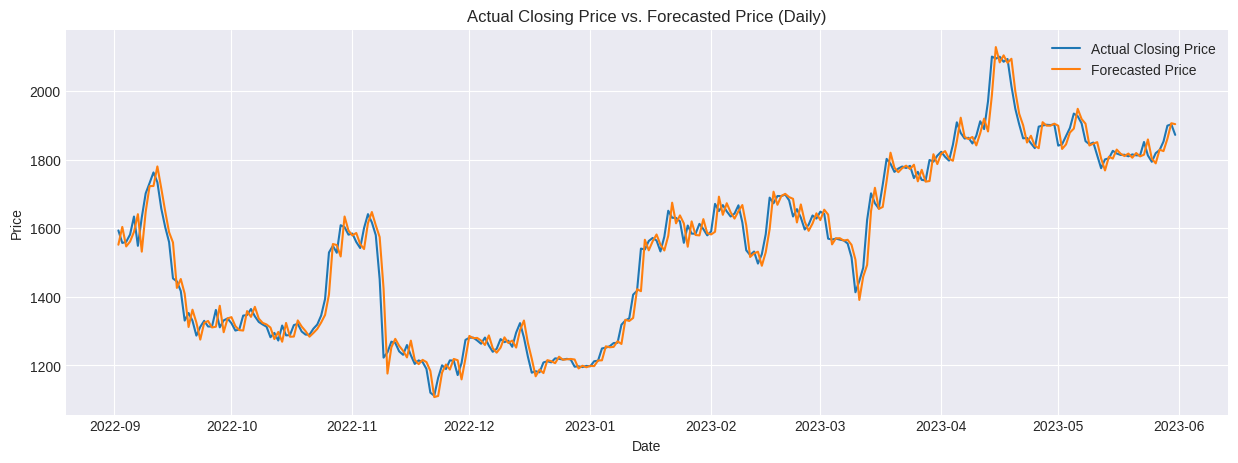

In [37]:
# Plot whole timeframe

test_ar_day['Daily_Forecast_ARIMA'] = daily_predictions

day_df = pd.concat([train_ar_day, test_ar_day], sort=False)

plt.figure(figsize=(15, 5))

plt.plot(day_df['date'][- len(y_test_d):], day_df['close'][- len(y_test_d):], label='Actual Closing Price')
plt.plot(day_df['date'][- len(y_test_d):], day_df['Daily_Forecast_ARIMA'][- len(y_test_d):], label='Forecasted Price')

plt.xlabel('Date')
plt.ylabel('Price')

plt.title('Actual Closing Price vs. Forecasted Price (Daily)')

plt.legend()

plt.show();

In [38]:
# Results ARIMA Daily Model

test_mae_ar = round(mean_absolute_error(test_ar_day['close'], test_ar_day['Daily_Forecast_ARIMA']))
test_rmse_ar = round(np.sqrt(mean_squared_error(test_ar_day['close'], test_ar_day['Daily_Forecast_ARIMA'])))
test_r2_ar = round((r2_score(test_ar_day['close'], test_ar_day['Daily_Forecast_ARIMA']))*100, 2)

print(f"test MAE ARIMA : {test_mae_ar}")
print(f"test RMSE ARIMA : {test_rmse_ar}")
print(f"test R2 ARIMA : {test_r2_ar}")

test MAE ARIMA : 29
test RMSE ARIMA : 40
test R2 ARIMA : 97.48


In [23]:
# save model
model_fit_d.save("/content/drive/MyDrive/ARIMA_d_ETH_(2,1,2).pkl")

# # # load model
# loaded = ARIMAResults.load('model.pkl')

## Hourly Dataframe

In [24]:
data_ETH.reset_index(inplace = True)

In [20]:
# Train/Test Split

split_date = "2023-05-12"

train_split = data_ETH['date'] <= split_date
test_split = data_ETH['date'] > split_date

train_ar = data_ETH[train_split]
test_ar = data_ETH[test_split]

columns = ['open', 'high', 'low', 'Volume', 'quote_volume', 'taker_buy_volume', 'taker_buy_quote_volume']

X_train, y_train = train_ar[columns], train_ar.close
X_test, y_test = test_ar[columns], test_ar.close

In [21]:
training_list = list(y_train)
test_list = list(y_test)

In [22]:
len(training_list), len(test_list)

(32342, 479)

In [ ]:
# Predict the values aggregating to the training list, the next value of the test list in a for loop

hourly_predictions = []

for i in range(len(y_test)):
  model = ARIMA(training_list, order=(2,1,1))
  model_fit = model.fit()
  hourly_forecast = model_fit.forecast()[0]

  # Value in the test set for the i iteration
  hourly_predictions.append(hourly_forecast)

  test_i = test_list[i]

  training_list.append(test_i)




In [26]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                32820
Model:                 ARIMA(2, 1, 1)   Log Likelihood             -142634.107
Date:                Wed, 21 Jun 2023   AIC                         285276.215
Time:                        17:20:05   BIC                         285309.810
Sample:                             0   HQIC                        285286.948
                              - 32820                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4347      0.047      9.318      0.000       0.343       0.526
ar.L2         -0.0431      0.002    -18.006      0.000      -0.048      -0.038
ma.L1         -0.4240      0.047     -9.043      0.000      -0.516      -0.332
sigma2       348.4722      0.684    509.559      0.000     347.132     349.813
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           1218348.74
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              36.03   Skew:                            -1.20
Prob(H) (two-sided):                  0.00   Kurtosis:                        32.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Plots Hourly

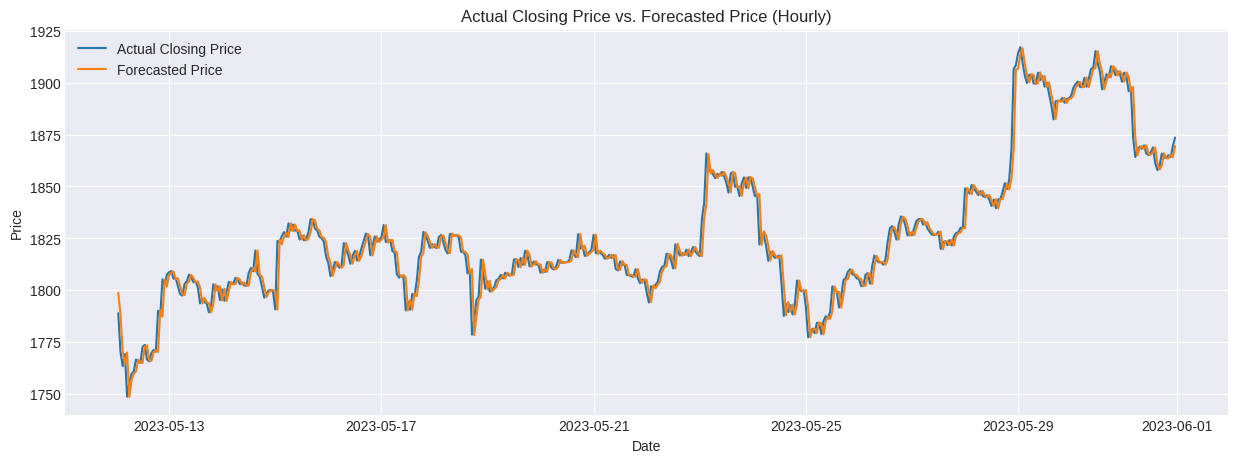

In [27]:
# Plot whole timeframe

test_ar['Hourly_Forecast_ARIMA'] = hourly_predictions

hour_df = pd.concat([train_ar, test_ar], sort=False)


plt.figure(figsize=(15, 5))

plt.plot(hour_df['date'][- len(y_test):], hour_df['close'][- len(y_test):], label='Actual Closing Price')
plt.plot(hour_df['date'][- len(y_test):], hour_df['Hourly_Forecast_ARIMA'][- len(y_test):], label='Forecasted Price')

plt.xlabel('Date')
plt.ylabel('Price')

plt.title('Actual Closing Price vs. Forecasted Price (Hourly)')

plt.legend()

plt.show();

In [28]:
# Results ARIMA Hourly Model

test_mae_ar_h = round(mean_absolute_error(test_ar['close'], test_ar['Hourly_Forecast_ARIMA']))
test_rmse_ar_h = round(np.sqrt(mean_squared_error(test_ar['close'], test_ar['Hourly_Forecast_ARIMA'])))
test_r2_ar_h = round((r2_score(test_ar['close'], test_ar['Hourly_Forecast_ARIMA']))*100, 2)


print(f"test MAE ARIMA : {test_mae_ar_h}")
print(f"test RMSE ARIMA : {test_rmse_ar_h}")
print(f"test R2 ARIMA : {test_r2_ar_h}")

test MAE ARIMA : 4
test RMSE ARIMA : 6
test R2 ARIMA : 96.95


In [29]:
# save model
model_fit.save("/content/drive/MyDrive/ARIMA_h_ETH_(2,1,1).pkl")

# # # load model
# loaded = ARIMAResults.load('model.pkl')

## Results Modeling

In [39]:
# Overall Results

results = {
    "METRIC": ["MAE", "RMSE", "R2"],
    "ARIMA_Daily": [test_mae_ar, test_rmse_ar, test_r2_ar],
    "ARIMA_Hourly": [test_mae_ar_h, test_rmse_ar_h, test_r2_ar_h]

}

df_results = pd.DataFrame(results)
df_results

,METRIC,ARIMA_Daily,ARIMA_Hourly
0,MAE,29.00,4.00
1,RMSE,40.00,6.00
2,R2,97.48,96.95
